Loading 1:  20%|█████████████▉                                                      | 499/2435 [01:02<04:03,  7.95it/s]


Applying t-SNE...


C:\Users\Anurag\cnn_env\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


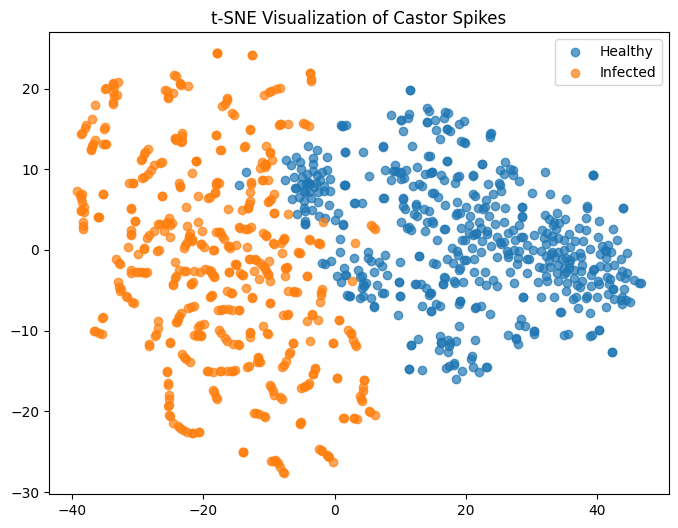

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

# Paths to data
healthy_path = r'D:\AI Algorithm\Castor\healthy spikes'
infected_path = r'D:\AI Algorithm\Castor\infected spikes'

# Image settings
IMAGE_SIZE = (128, 128)  # Resize to reduce computation
NUM_IMAGES = 500  # Limit to speed up t-SNE

def load_images_from_folder(folder, label, max_images=NUM_IMAGES):
    images = []
    labels = []
    count = 0
    for filename in tqdm(os.listdir(folder), desc=f"Loading {label}"):
        img_path = os.path.join(folder, filename)
        try:
            with Image.open(img_path).convert('RGB') as img:
                img = img.resize(IMAGE_SIZE)
                img_array = np.array(img).flatten()  # Flatten into 1D vector
                images.append(img_array)
                labels.append(label)
                count += 1
                if count >= max_images:
                    break
        except Exception as e:
            print(f"Could not load {filename}: {e}")
    return images, labels

# Load both classes
healthy_images, healthy_labels = load_images_from_folder(healthy_path, 0)  # 0 for healthy
infected_images, infected_labels = load_images_from_folder(infected_path, 1)  # 1 for infected

# Combine
X = np.array(healthy_images + infected_images)
y = np.array(healthy_labels + infected_labels)

# Standardize data (important for t-SNE)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply t-SNE
print("Applying t-SNE...")
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=500)
X_tsne = tsne.fit_transform(X_scaled)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[y == 0, 0], X_tsne[y == 0, 1], label='Healthy', alpha=0.7)
plt.scatter(X_tsne[y == 1, 0], X_tsne[y == 1, 1], label='Infected', alpha=0.7)
plt.title('t-SNE Visualization of Castor Spikes')
plt.legend()
plt.show()
